In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
import tensorflow as tf
df=sns.load_dataset('tips')

df=pd.get_dummies(df,drop_first=True)

df['tip']=(df['tip']>2).astype(int)

X=df.drop('tip',axis=1)
y=df['tip']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Building The Mode

model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,activation='relu',                  #input layer
                          input_shape=(X_train.shape[1],)),

    tf.keras.layers.Dense(32,activation='relu'),                #hidden layer
    tf.keras.layers.Dense(1)               #output layer


])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#Training The Model
model.fit(X_train,y_train,epochs=10,batch_size=32,verbose=1,validation_split=0.2)

#Evaluating The Model
loss=model.evaluate(X_test,y_test,verbose=1)

print('Binary Crossentropy Loss:', loss[0])
print('Accuracy:', loss[1])


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6564 - loss: 0.6568  
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7128 - loss: 0.6120 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7128 - loss: 0.5877 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7128 - loss: 0.5751 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7128 - loss: 0.5677 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7128 - loss: 0.5621 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7128 - loss: 0.5569 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7128 - loss: 0.5508 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7128 - loss: 0.5470 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7128 - loss: 0.5438 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5510 - loss: 0.6872 
Binary Crossentropy Loss: 0.6871955990791321
Accuracy: 0.5510203838348389


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.2872 - loss: 0.8221 - val_accuracy: 0.4490 - val_loss: 0.7322
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2923 - loss: 0.7723 - val_accuracy: 0.4490 - val_loss: 0.7130
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3179 - loss: 0.7315 - val_accuracy: 0.4082 - val_loss: 0.7006
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4103 - loss: 0.7022 - val_accuracy: 0.5306 - val_loss: 0.6928
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - loss: 0.6798 - val_accuracy: 0.5510 - val_loss: 0.6887
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7077 - loss: 0.6602 - val_accuracy: 0.5510 - val_loss: 0.6866
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7128 - loss: 0.6456 - val_accuracy: 0.5510 - val_loss: 0.6857
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7128 - loss: 0.6320 - val_accuracy: 0.5510 - val_loss:

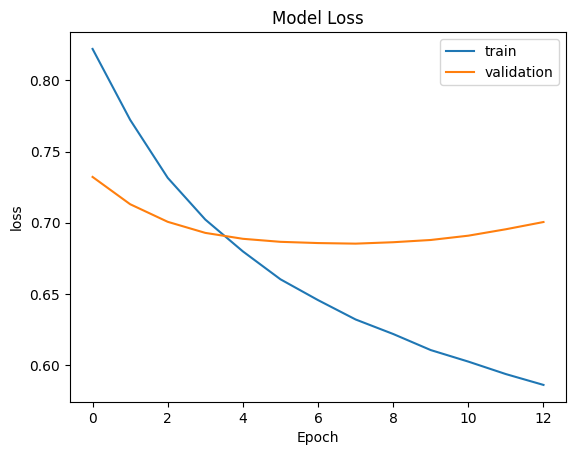

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Building The Model

model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,activation='relu',                  #input layer
                          input_shape=(X_train.shape[1],)),

    tf.keras.layers.Dense(32,activation='relu'),                #hidden layer
    tf.keras.layers.Dense(1)               #output layer


])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

early_stopping=EarlyStopping(patience=5)

#Training The Model
history=model.fit(X_train,y_train,
                  epochs=100,batch_size=67,
                  validation_data=(X_test,y_test),
                  callbacks=[early_stopping],
                  verbose=1)

#Evaluating The Model
loss=model.evaluate(X_test,y_test,verbose=1)
print('Binary Crossentropy Loss:', loss[0])
print('Accuracy:', loss[1])

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc="upper right")
plt.show()